In [1]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

# loading the iris dataset 
iris = datasets.load_iris()

In [2]:
# X -> features, y -> label 
X = iris.data 
y = iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

In [7]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [8]:
dtree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
len(X_test)

38

In [12]:
len(dtree_predictions)

38

In [13]:
dtree_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [14]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

In [15]:
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  3,  6]], dtype=int64)

# Random Forest

랜덤포레스트 구현 절차:
1. 주어진 데이터셋에서 n개의 데이터를 무작위로(중복을 허용하여) 선택한다. -> bootstrap
2. 선택된 n개의 데이터의 feature들중 중복을 허용하지 않고 m개를 선택한다.
3. 주어진 데이터와 feature를 바탕으로 decision tree를 생성한다.
4. 1~3의 과정을 k번 반복한다.
5. 4의 과정을 통해 생성된 k개의 decision tree를 이용하여 예측하고, 예측된 결과의 평균이나 다수결의 예측으로 최종 예측결과를 결정한다. -> ensamble
** bootstrap으로 다양한 분류기(decision tree)에 대해 ensamble 기법을 사용하여 특징적인 하나의 분류기로 구분하는 방법을 bagging이라고 한다. 

In [14]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [7]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)

In [9]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

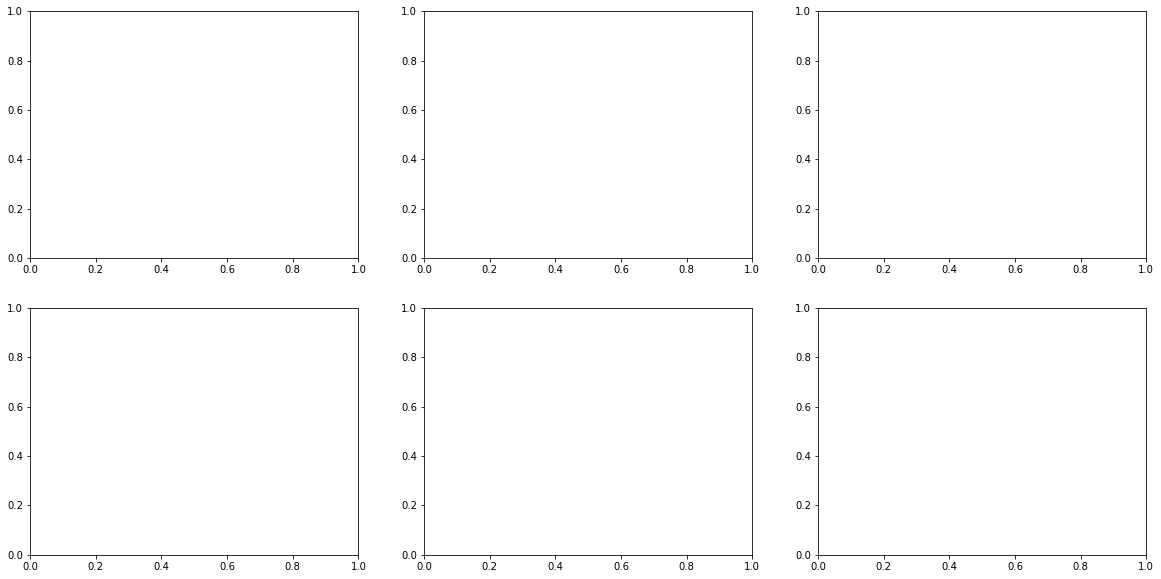

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

In [16]:
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    print(i)
    print(ax)
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

0
AxesSubplot(0.125,0.536818;0.227941x0.343182)
1
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
2
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
3
AxesSubplot(0.125,0.125;0.227941x0.343182)
4
AxesSubplot(0.398529,0.125;0.227941x0.343182)


In [17]:
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)

In [18]:
axes[-1, -1].set_title("random forest")

Text(0.5, 1, 'random forest')

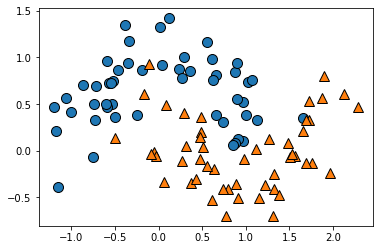

In [19]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [21]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE8173B888>,
      dtype=object)

# IRIS DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

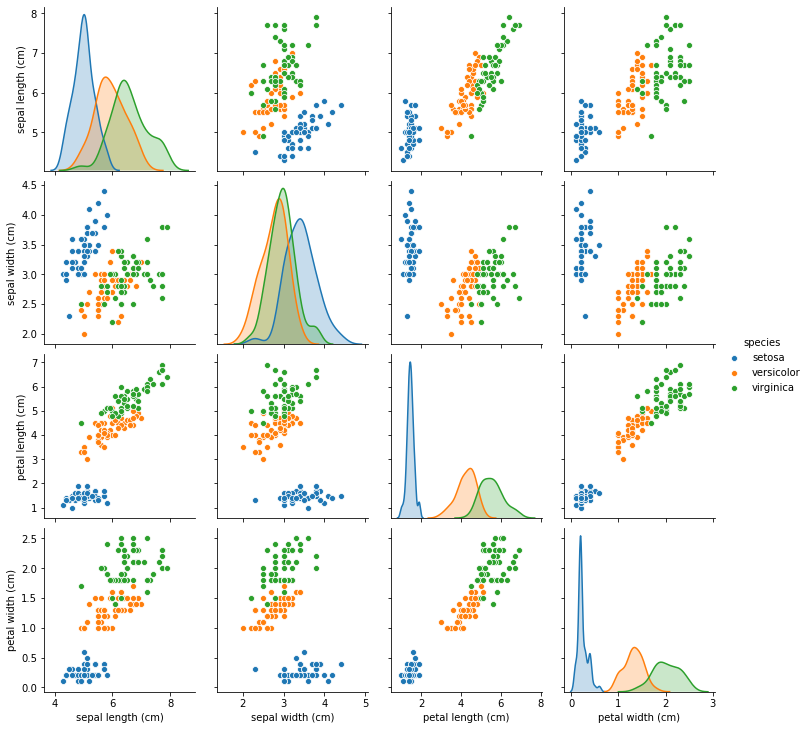

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])

sns.pairplot(df, hue='species')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.25, stratify=iris.target, random_state=123456)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
#oob_scord : estimates the accuracy of the random forest.
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [6]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.946
Mean accuracy score: 0.921


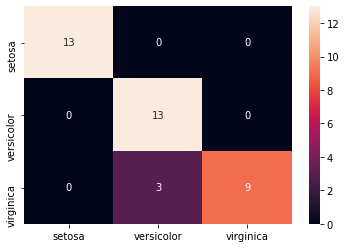

In [7]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

# Another Version

In [9]:
import pandas as pd
 
from sklearn import datasets
 
if __name__ == '__main__':
    iris = datasets.load_iris()
    print('species :', iris.target_names)
    print('target : [0:setosa, 1:versicolor, 2:virginica]')
    print('number of data :', len(iris.data))
    print('col_names :', iris.feature_names)
 
    # iris data Dataframe으로
    data = pd.DataFrame(
        {
            'sepal length': iris.data[:, 0],
            'sepal width': iris.data[:, 1],
            'petal length': iris.data[:, 2],
            'petal width': iris.data[:, 3],
            'species': iris.target
        }
    )
    print(data.head())

species : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginica]
number of data : 150
col_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [10]:
from sklearn.model_selection import train_test_split
 
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']
 
# train_test ratio : 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

105
45
105
45


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# training
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
# predict(test)
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))
 
# checking accuracy
print('accuracy :', metrics.accuracy_score(y_test, y_pred))

[1 0 0 1 1 0 2 2 2 1 2 0 0 0 1 1 0 1 2 2 2 0 0 2 1 0 1 2 2 1 1 0 0 2 0 2 2
 2 1 2 2 2 2 1 1]
[1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1]
accuracy : 0.9555555555555556
